# 1.  Importing libraries and data preparation

In [1]:
import numpy as np
import pandas as pd
import cv2
import mediapipe as mp

2024-03-10 16:23:32.513668: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 16:23:32.606553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_df = pd.read_csv('landmark_data/landmarks_train_v3.csv')
test_df = pd.read_csv('landmark_data/landmarks_test_v3.csv')

print(train_df.shape)
print(test_df.shape)

train_df.head()


(27200, 85)
(6800, 85)


,class,lx1,ly1,lx2,ly2,lx3,ly3,lx4,ly4,lx5,...,rx17,ry17,rx18,ry18,rx19,ry19,rx20,ry20,rx21,ry21
0,learn,0.736513,0.869276,0.748878,0.764716,0.712713,0.668282,0.668976,0.594444,0.647374,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,learn,0.694782,0.694662,0.693147,0.616500,0.663010,0.551663,0.623375,0.519675,0.590227,...,0.595989,0.44838,0.533921,0.62249,0.561276,0.565675,0.577589,0.529806,0.59453,0.499018
2,learn,0.836391,0.728574,0.835892,0.647806,0.806623,0.571064,0.775611,0.519080,0.753045,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,learn,0.867615,0.577222,0.863424,0.484014,0.826190,0.422347,0.786751,0.388529,0.755601,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,learn,0.435689,0.921543,0.433705,0.829402,0.474902,0.755979,0.527494,0.727433,0.569769,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [4]:
train_df['class'].value_counts()

class
help     1602
where    1601
learn    1600
meet     1600
me       1600
sorry    1600
nice     1600
up       1600
like     1600
house    1600
wait     1600
love     1600
see      1600
name     1600
hello    1600
you      1599
how      1598
Name: count, dtype: int64

In [3]:
test_df['class'].value_counts()

class
learn    400
me       400
you      400
like     400
meet     400
nice     400
sorry    400
up       400
help     400
how      400
wait     400
where    400
love     400
see      400
hello    400
house    400
name     400
Name: count, dtype: int64

# 2. Creating Train and Test Data and Normalizing


In [4]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [5]:
X_train, X_test, y_train, y_test

(array([[0.73651308, 0.86927605, 0.74887806, ..., 0.        , 0.        ,
         0.        ],
        [0.69478232, 0.69466233, 0.69314706, ..., 0.52980614, 0.59452951,
         0.49901837],
        [0.83639121, 0.72857374, 0.83589172, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.35466653, 0.7850008 , 0.39938077, ..., 0.        , 0.        ,
         0.        ],
        [0.35466653, 0.7850008 , 0.39938077, ..., 0.        , 0.        ,
         0.        ],
        [0.36416525, 0.78774059, 0.40908781, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.45209068, 0.80846977, 0.44959193, ..., 0.        , 0.        ,
         0.        ],
        [0.13624559, 0.648803  , 0.11357365, ..., 0.        , 0.        ,
         0.        ],
        [0.42375904, 0.40960792, 0.41831791, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.59581244, 0.69710648, 0.56409794, ..., 0.        , 0.        ,
         0.        ],
        [0.5

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 3. Classification model building

## 3.1 Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

classifier_1 = DecisionTreeClassifier()
classifier_1.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred_1 = classifier_1.predict(X_test)
y_pred_1

array(['learn', 'learn', 'learn', ..., 'you', 'you', 'you'], dtype=object)

## 3.2 Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier_2 = RandomForestClassifier(n_estimators=100)
classifier_2.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
y_pred_2 = classifier_2.predict(X_test)
y_pred_2

array(['learn', 'learn', 'learn', ..., 'you', 'you', 'you'], dtype=object)

## 3.3 Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression

classifier_3 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
classifier_3.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [14]:
y_pred_3 = classifier_3.predict(X_test)
y_pred_3

array(['learn', 'learn', 'learn', ..., 'you', 'you', 'you'], dtype=object)

## 3.4 Gaussian Naive Bayes Model

In [15]:
from sklearn.naive_bayes import GaussianNB

classifier_4 = GaussianNB(priors = None, var_smoothing = 1e-09)
classifier_4.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred_4 = classifier_4.predict(X_test)
y_pred_4

array(['you', 'how', 'hello', ..., 'you', 'you', 'you'], dtype='<U5')

## 3.5 Support Vector Machines Model

In [47]:
from sklearn.svm import SVC
classifier_5 = SVC(kernel='rbf', C=1000, random_state = 1)
classifier_5.fit(X_train,y_train)

SVC(C=1000, random_state=1)

In [48]:
y_pred_5 = classifier_5.predict(X_test)
y_pred_5

array(['learn', 'learn', 'learn', ..., 'you', 'you', 'you'], dtype=object)

## 3.6 K-Nearest Neighbours Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

classifier6 = KNeighborsClassifier(n_neighbors=3)

classifier6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred_6 = classifier6.predict(X_test)
y_pred_6

array(['learn', 'learn', 'learn', ..., 'you', 'you', 'you'], dtype=object)

# 4. Calculating model accuracy

## 4.1 Decision Tree model accuracy

In [21]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_1))
print(accuracy_score(y_test, y_pred_1))

              precision    recall  f1-score   support

       hello       0.93      0.96      0.94       400
        help       0.67      0.55      0.60       400
       house       0.77      0.61      0.68       400
         how       0.88      0.82      0.85       400
       learn       0.69      0.79      0.74       400
        like       0.88      0.97      0.92       400
        love       0.59      0.65      0.62       400
          me       0.70      0.55      0.62       400
        meet       0.85      0.79      0.82       400
        name       0.72      0.60      0.65       400
        nice       1.00      1.00      1.00       400
         see       1.00      0.98      0.99       400
       sorry       0.50      0.82      0.62       400
          up       0.98      0.97      0.98       400
        wait       0.99      1.00      0.99       400
       where       0.95      0.93      0.94       400
         you       0.87      0.81      0.84       400

    accuracy              

## 4.2 Random forest Classifier model accuracy

In [22]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_2))
print(accuracy_score(y_test, y_pred_2))

              precision    recall  f1-score   support

       hello       0.99      1.00      0.99       400
        help       0.96      0.70      0.81       400
       house       0.95      0.88      0.92       400
         how       0.98      1.00      0.99       400
       learn       0.87      0.95      0.91       400
        like       0.98      0.99      0.99       400
        love       0.92      0.89      0.90       400
          me       0.79      0.61      0.69       400
        meet       0.96      0.90      0.93       400
        name       0.85      0.71      0.77       400
        nice       1.00      1.00      1.00       400
         see       1.00      1.00      1.00       400
       sorry       0.55      0.93      0.69       400
          up       0.99      0.98      0.99       400
        wait       1.00      1.00      1.00       400
       where       1.00      0.99      0.99       400
         you       0.96      0.96      0.96       400

    accuracy              

## 4.3 Logistic Regression model accuracy

In [23]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_3))
print(accuracy_score(y_test, y_pred_3))

              precision    recall  f1-score   support

       hello       0.97      1.00      0.99       400
        help       0.48      0.42      0.45       400
       house       0.90      0.92      0.91       400
         how       0.97      1.00      0.98       400
       learn       0.93      0.94      0.93       400
        like       1.00      1.00      1.00       400
        love       0.84      0.92      0.88       400
          me       0.74      0.74      0.74       400
        meet       0.99      0.85      0.91       400
        name       0.90      0.76      0.82       400
        nice       1.00      1.00      1.00       400
         see       0.98      1.00      0.99       400
       sorry       0.60      0.80      0.69       400
          up       0.90      0.97      0.93       400
        wait       1.00      1.00      1.00       400
       where       1.00      1.00      1.00       400
         you       0.96      0.75      0.84       400

    accuracy              

## 4.4 Gaussian Naive Bayes Model Accuracy

In [24]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_4))
print(accuracy_score(y_test, y_pred_4))

              precision    recall  f1-score   support

       hello       0.37      0.65      0.47       400
        help       0.00      0.00      0.00       400
       house       0.12      0.01      0.03       400
         how       0.26      0.71      0.38       400
       learn       0.00      0.00      0.00       400
        like       0.92      0.09      0.16       400
        love       0.03      0.00      0.00       400
          me       0.25      0.59      0.35       400
        meet       0.44      0.76      0.56       400
        name       0.33      0.00      0.00       400
        nice       0.51      0.35      0.41       400
         see       0.64      0.42      0.51       400
       sorry       0.17      0.34      0.22       400
          up       0.14      0.21      0.17       400
        wait       0.91      0.50      0.64       400
       where       0.51      0.47      0.49       400
         you       0.19      0.34      0.25       400

    accuracy              

/home/karthik/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/karthik/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/karthik/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.5 Support Vector Machines Model Accuracy

In [49]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_5))
print(accuracy_score(y_test, y_pred_5))

              precision    recall  f1-score   support

       hello       1.00      1.00      1.00       400
        help       0.74      0.83      0.78       400
       house       0.99      1.00      0.99       400
         how       0.95      0.98      0.96       400
       learn       0.94      0.97      0.95       400
        like       1.00      1.00      1.00       400
        love       0.93      0.93      0.93       400
          me       0.95      0.70      0.80       400
        meet       0.96      0.95      0.95       400
        name       1.00      0.76      0.86       400
        nice       1.00      0.99      1.00       400
         see       1.00      1.00      1.00       400
       sorry       0.72      0.94      0.81       400
          up       1.00      0.97      0.99       400
        wait       1.00      1.00      1.00       400
       where       1.00      1.00      1.00       400
         you       0.94      0.95      0.95       400

    accuracy              

## 4.6 K-Nearest Neighbours Model Accuracy

In [26]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_6))
print(accuracy_score(y_test, y_pred_6))

              precision    recall  f1-score   support

       hello       0.89      0.92      0.90       400
        help       0.81      0.67      0.73       400
       house       0.91      0.91      0.91       400
         how       0.77      0.98      0.87       400
       learn       0.85      0.97      0.91       400
        like       0.98      0.95      0.97       400
        love       0.84      0.92      0.88       400
          me       0.83      0.61      0.70       400
        meet       0.95      0.93      0.94       400
        name       0.96      0.76      0.85       400
        nice       0.91      0.89      0.90       400
         see       1.00      1.00      1.00       400
       sorry       0.57      0.82      0.67       400
          up       0.97      0.93      0.95       400
        wait       1.00      0.99      1.00       400
       where       0.96      0.96      0.96       400
         you       0.87      0.69      0.77       400

    accuracy              

# 5. Graph Plotting analysis


## 5.1 KNN n_neighbours 

In [83]:
knn_accuracy_values = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracy_values.append(accuracy_score(y_test, y_pred))

In [84]:
print(knn_accuracy_values)

[0.8925, 0.8877941176470588, 0.8770588235294118, 0.8717647058823529, 0.8666176470588235, 0.8605882352941177, 0.8598529411764706, 0.8558823529411764, 0.8497058823529412, 0.8460294117647059]


Text(0, 0.5, 'Accuracy Score')

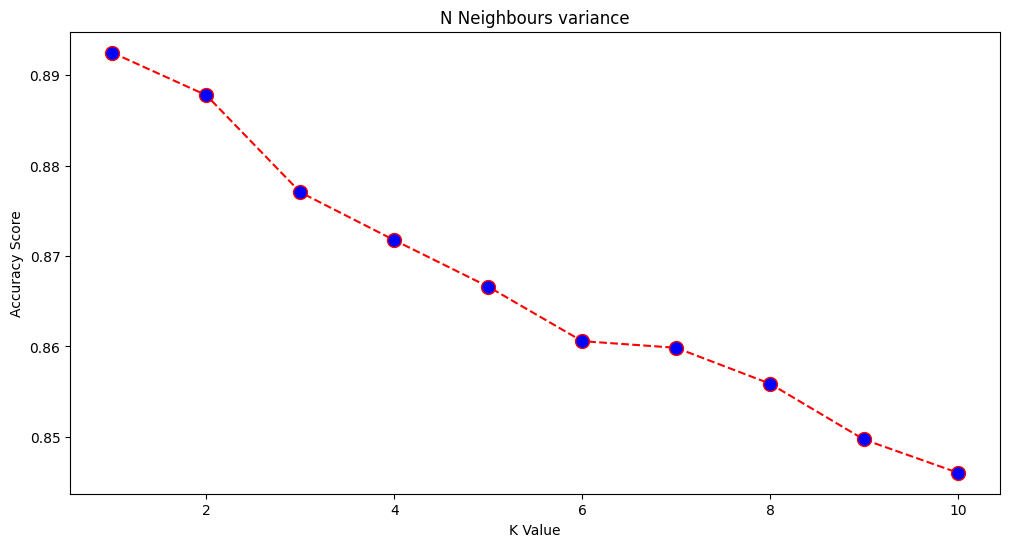

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11 ), knn_accuracy_values, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('N Neighbours variance')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

## 5.2 Random Forest n_estimators

In [95]:
rfc_accuracy_values = []

for i in range(1, 11):
    rfc = RandomForestClassifier(n_estimators=100*i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_accuracy_values.append(accuracy_score(y_test, y_pred))

In [96]:
rfc_accuracy_values

[0.9054411764705882,
 0.9114705882352941,
 0.9141176470588235,
 0.9123529411764706,
 0.9122058823529412,
 0.9125,
 0.9113235294117648,
 0.9125,
 0.9127941176470589,
 0.9125]

Text(0, 0.5, 'Accuracy Score')

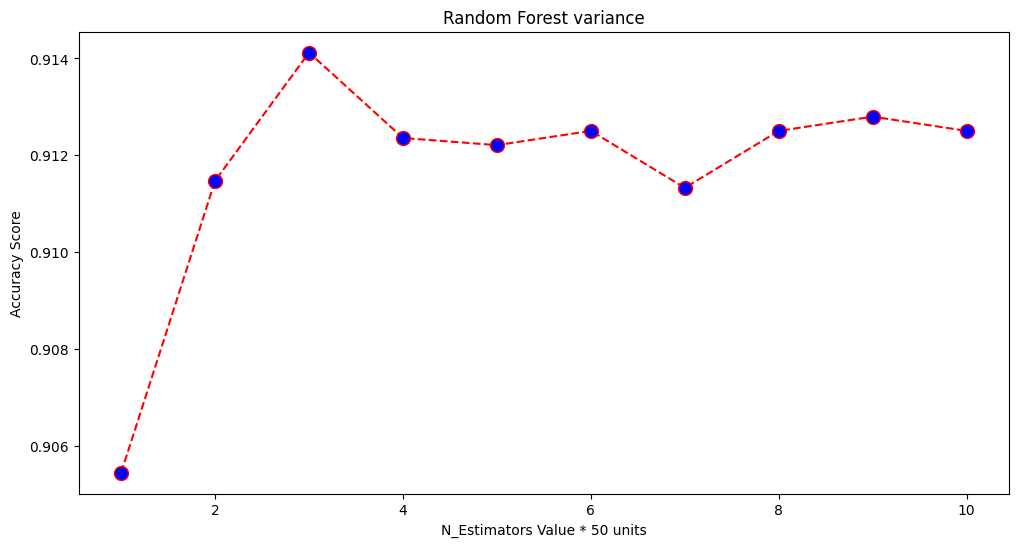

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11 ), rfc_accuracy_values, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Random Forest variance')
plt.xlabel('N_Estimators Value * 50 units')
plt.ylabel('Accuracy Score')

## 5.3 SVC Classifiers variance 

In [44]:
from sklearn.svm import SVC

svc_accuracy_values = []
C_values = [0.1, 1, 10, 100, 500, 1000, 1500, 2000]

for i in range(8):
    svc = SVC(kernel='rbf', C = C_values[i], gamma='scale')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    svc_accuracy_values.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy Score')

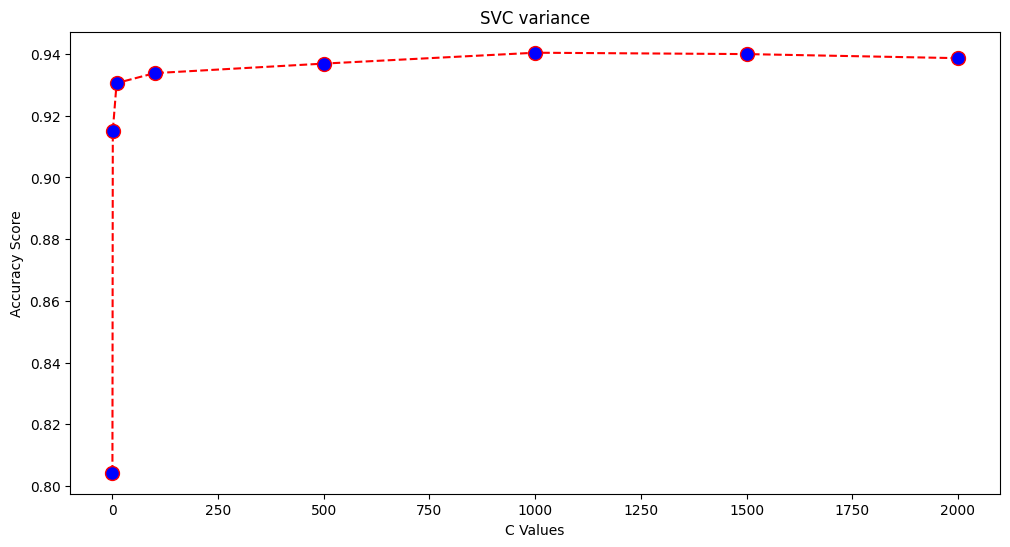

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(C_values, svc_accuracy_values, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('SVC variance')
plt.xlabel('C Values')
plt.ylabel('Accuracy Score')

# 6. Boosting Models 

## 6.1 Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=42)

In [29]:
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.691764705882353


## 6.2 XG Boosting 

In [30]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

xgb_classifier = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42)
xgb_classifier.fit(X_train, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
from sklearn.metrics import classification_report, accuracy_score
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_pred, y_test_encoded)
print('Accuracy : ', accuracy)


Accuracy :  0.9254411764705882


## 6.3 AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_classifier.fit(X_train, y_train)

/home/karthik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [33]:
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1751470588235294


## 6.4 CatBoost

In [34]:
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, random_state=42)
catboost_classifier.fit(X_train, y_train, verbose=0)

In [35]:
y_pred = catboost_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8551470588235294


# 7. Model Saving

In [8]:
import pickle

In [51]:
#support vector classifier ( C = 1000, kernel = rbf ) has accuracy of 94+
with open('trained_models/svc_model.pkl', 'wb') as f:
    pickle.dump(classifier_5, f)

In [53]:
with open('trained_models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(classifier_2, f)

In [9]:
with open('trained_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)